# Lecture 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=[15,10]

In [3]:
from skimage import io
I = io.imread('watch.jpg')

In [4]:
from skimage.exposure import equalize_hist
I = equalize_hist(I)

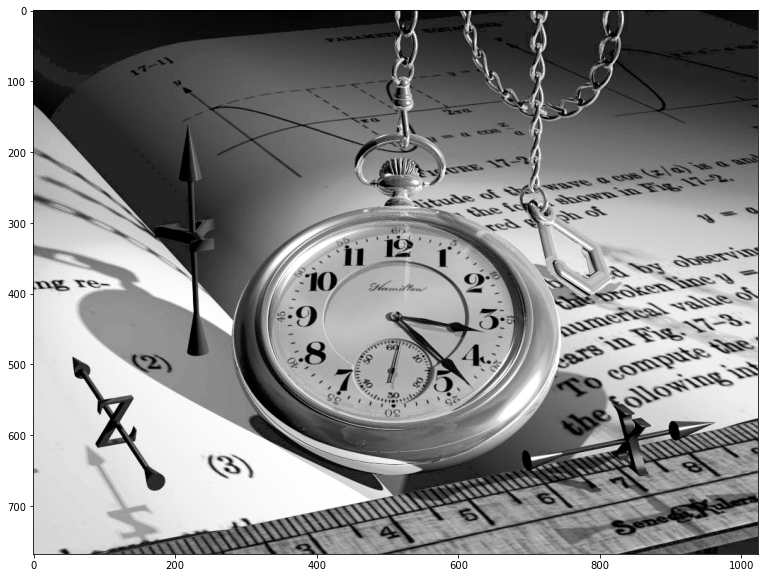

In [5]:
plt.imshow(I)

### Convolution

In [6]:
from scipy.ndimage import convolve

In [7]:
avg = np.ones((7,7))/49

In [8]:
print(avg)

[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


In [10]:
B = convolve(I,avg)

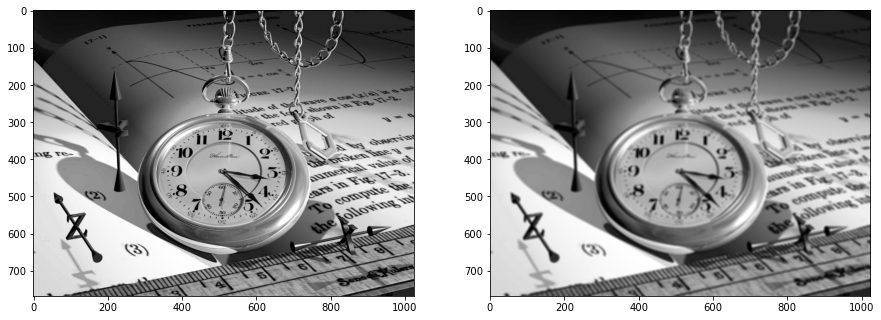

In [11]:
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(B)

### Gaussian filtering

In [12]:
from skimage import filters

In [13]:
G = filters.gaussian(I,3)

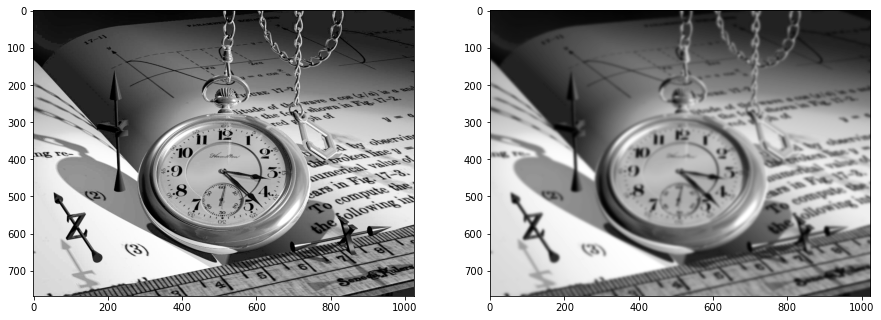

In [14]:
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(G)

### Median filtering

In [15]:
M = filters.median(I,np.ones((7,7)))

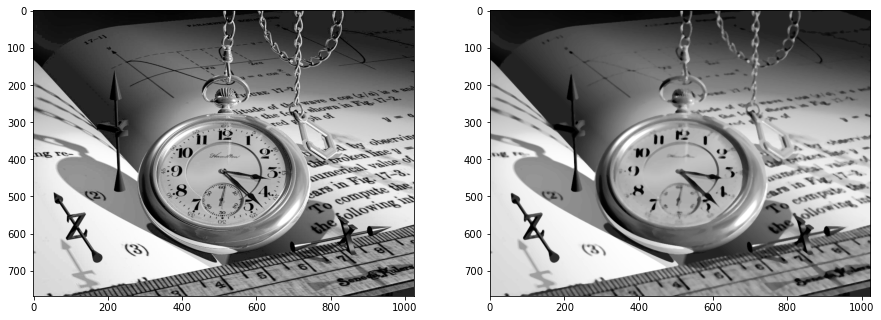

In [16]:
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(M)

### Sharpening

In [17]:
J = I[300:400,500:600]

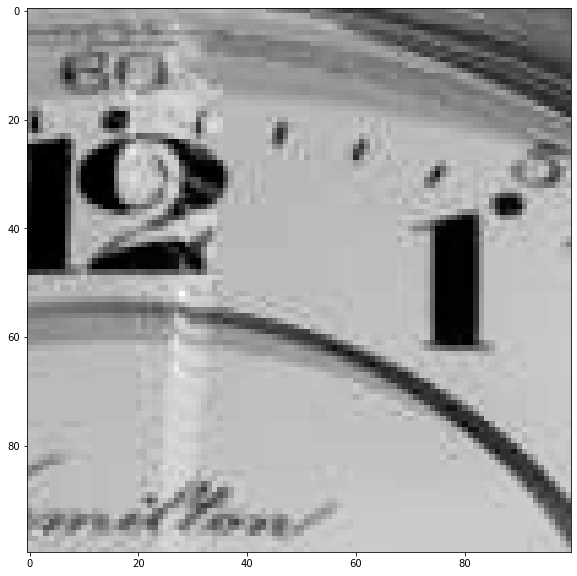

In [18]:
plt.imshow(J)

In [19]:
from skimage.transform import rescale

In [20]:
K = rescale(J,4)

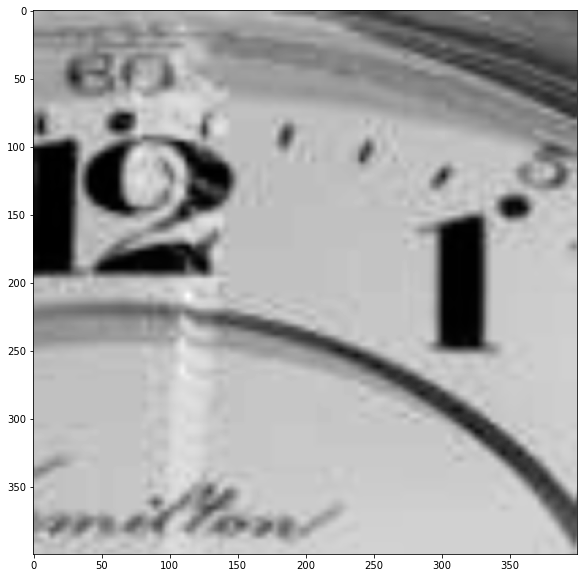

In [21]:
plt.imshow(K)

In [22]:
K.shape

(400, 400)

In [23]:
lap = np.ones((3,3))
lap[1,1] = -8

In [24]:
print(lap)

[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]


In [25]:
L = convolve(K,lap)

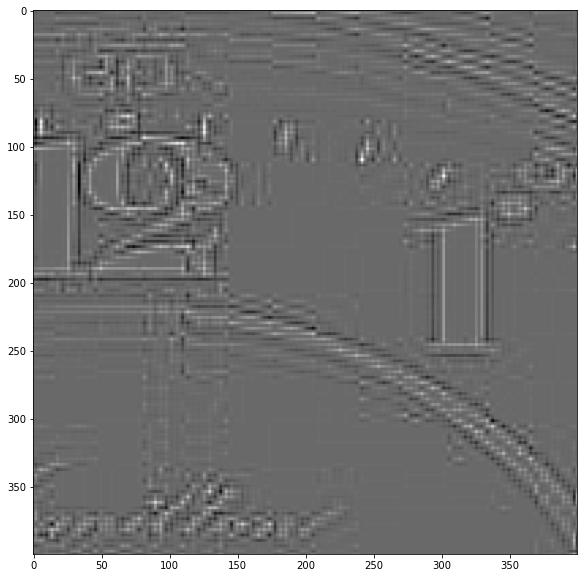

In [26]:
plt.imshow(L)

In [27]:
S = np.clip(K-L,0,1)

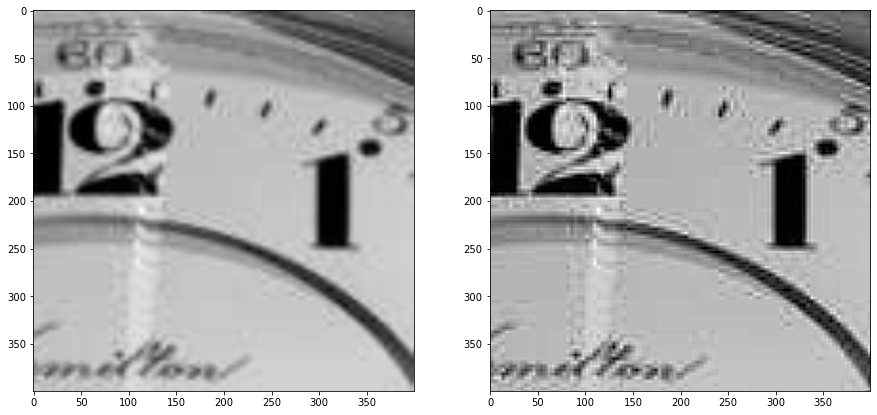

In [28]:
plt.subplot(121)
plt.imshow(K)
plt.subplot(122)
plt.imshow(S)

### High-boost filtering

In [29]:
B = filters.gaussian(K,2)

In [30]:
M = K-B

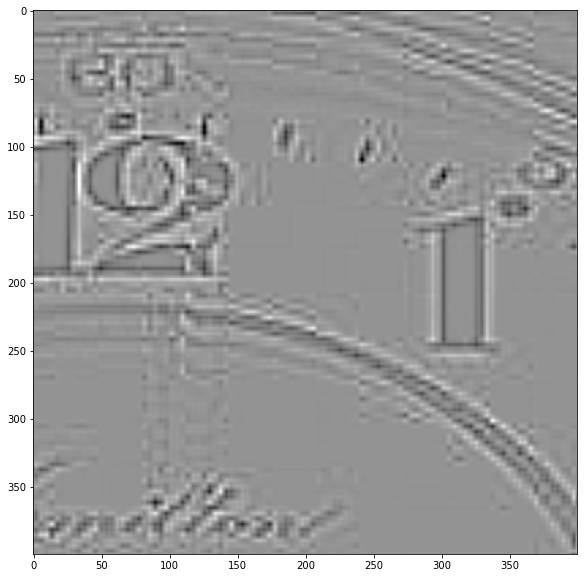

In [31]:
plt.imshow(M)

In [32]:
N = np.clip(K + 2*M,0,1)

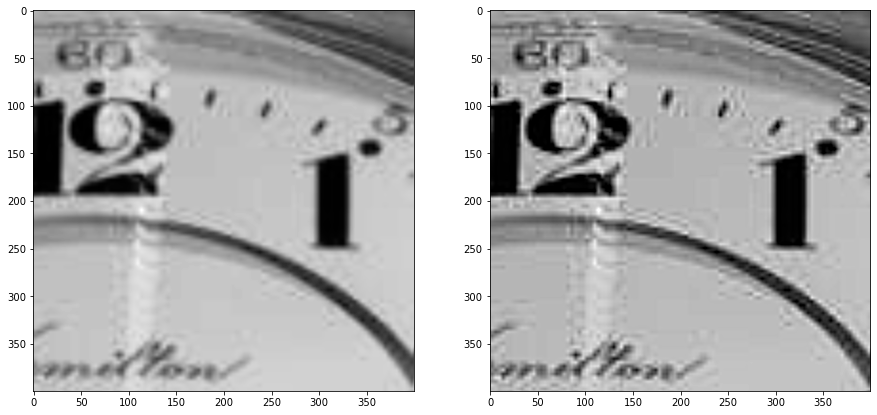

In [33]:
plt.subplot(121)
plt.imshow(K)
plt.subplot(122)
plt.imshow(N)

### Gradient

In [34]:
gx = filters.sobel_h(I)
gy = filters.sobel_v(I)

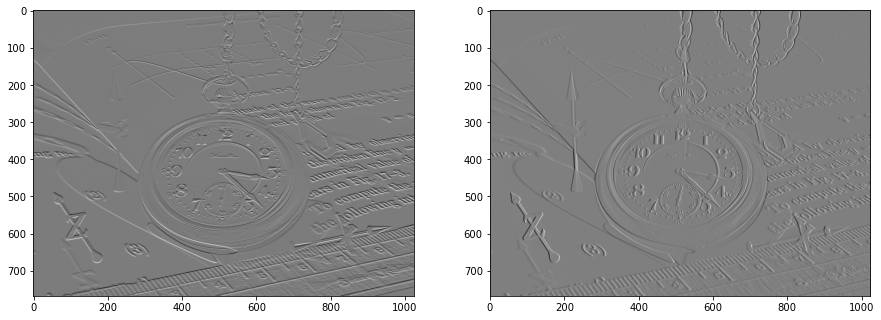

In [35]:
plt.subplot(121)
plt.imshow(gx)
plt.subplot(122)
plt.imshow(gy)

In [36]:
G = np.sqrt(gx**2 + gy**2)

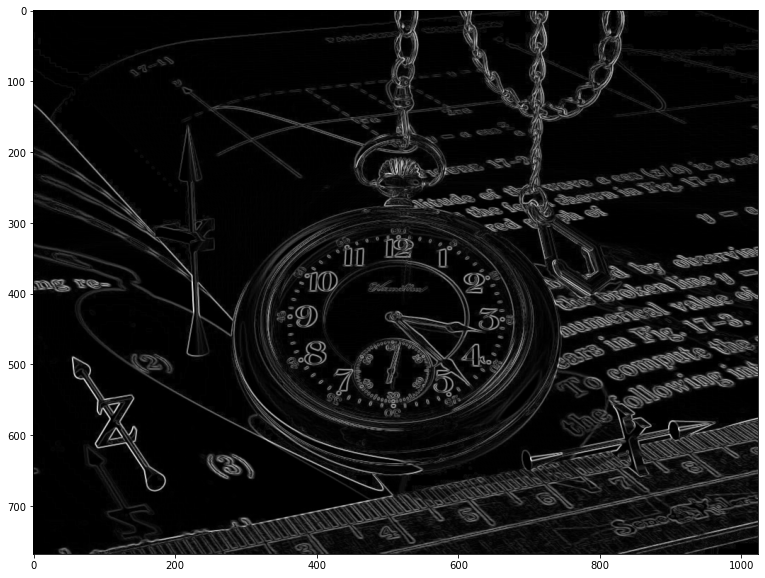

In [37]:
plt.imshow(G)

In [38]:
A = np.arctan2(gy,gx)

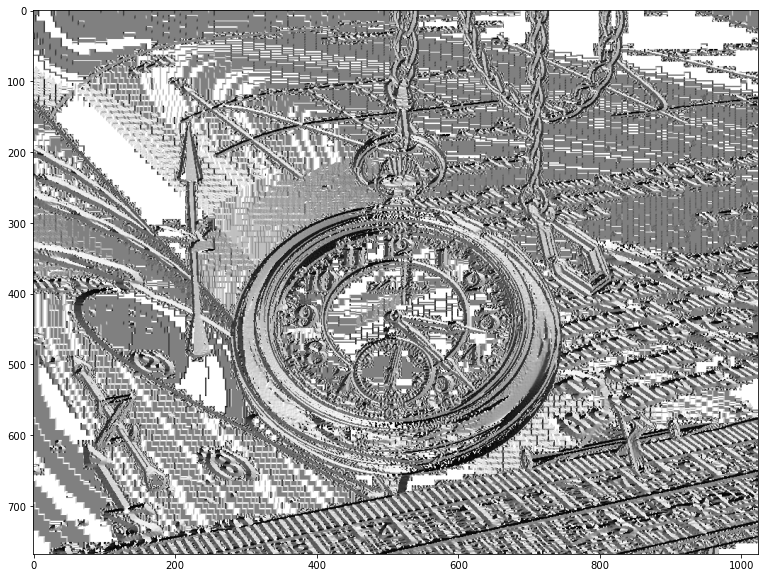

In [39]:
plt.imshow(A)